# <center> Predição de Potenciais Clientes </center>

### Bibliotecas Utilizadas

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,recall_score, f1_score, classification_report, roc_curve, auc

### Consumo e Tratamento

In [116]:
# Carregando os dados
base = pd.read_csv("Praceando_supervisionado.csv")
base    

Id        faixa_etaria      regiao          tipo_usuario  \
0    1   menor que 18 anos       oeste  participo de eventos   
1    2   menor que 18 anos       norte  participo de eventos   
2    3  entre 30 e 59 anos       norte                nenhum   
3    4  entre 30 e 59 anos       oeste                nenhum   
4    5  entre 18 e 30 anos       norte  participo de eventos   
..  ..                 ...         ...                   ...   
93  89  entre 18 e 30 anos         sul                 ambos   
94  90  entre 18 e 30 anos       oeste      organizo eventos   
95  91  entre 30 e 59 anos      centro                 ambos   
96  92    mais que 60 anos  n/a regiao      organizo eventos   
97  92    mais que 60 anos  n/a regiao      organizo eventos   

   dificuldade_divulgacao difuculdade_participacao is_microempreendedor  \
0                     não                      sim                  não   
1                     não                      sim                  não   
2                     não                      não                  não   
3                     não                      não                  não   
4                     não                      sim                  não   
..                    ...                      ...                  ...   
93                    sim                      não                  sim   
94                    sim                      não                  sim   
95                    sim                      não                  sim   
96                    sim                      não                  sim   
97                    sim                      não                  sim   

                       frequencia_divulgacao             pagar_divulgacao  \
0                       não costumo divulgar          com certeza pagaria   
1                       não costumo divulgar  pagaria dependendo do valor   
2                       não costumo divulgar                  não pagaria   
3                       não costumo divulgar                  não pagaria   
4                       não costumo divulgar                  não pagaria   
..                                       ...                          ...   
93        ocasionalmente (3-6 vezes por ano)          com certeza pagaria   
94  frequentemente (7 ou mais vezes por ano)          com certeza pagaria   
95        ocasionalmente (3-6 vezes por ano)          com certeza pagaria   
96  frequentemente (7 ou mais vezes por ano)  pagaria dependendo do valor   
97  frequentemente (7 ou mais vezes por ano)  pagaria dependendo do valor   

   receber_notificacao  meios_divulgacao_boca_a_boca  \
0                  não                         False   
1                  não                         False   
2                  não                         False   
3                  sim                         False   
4                  não                         False   
..                 ...                           ...   
93                 sim                         False   
94                 sim                         False   
95                 sim                         False   
96                 sim                          True   
97                 sim                         False   

    meios_divulgacao_não_costumo_divulgar  meios_divulgacao_panfletos/flyers  \
0                                    True                              False   
1                                    True                              False   
2                                    True                              False   
3                                    True                              False   
4                                    True                              False   
..                                    ...                                ...   
93                                  False                               True   
94                                  False                              False   
95              

In [117]:
base["is_anunciante"].value_counts()

is_anunciante
0    78
1    20
Name: count, dtype: int64

In [118]:
pipeline = Pipeline(steps=[
    ("preprocessador", ColumnTransformer(
        transformers=[
            # Aplicar OrdinalEncoder nas demais colunas categóricas
            ("ordinal", OrdinalEncoder(), 
             make_column_selector(dtype_include=["object", "bool"])),
        ],
        remainder="passthrough", 
        verbose_feature_names_out=False)),
        # Aplicar StandardScaler nas colunas numéricas
    ("transformer", StandardScaler())
])

In [119]:
x = base.drop(["Id","is_anunciante"],axis=1)
y = base[["is_anunciante"]]

In [90]:
x_transformed = pd.DataFrame(pipeline.fit_transform(x), columns=pipeline.get_feature_names_out())
display(x_transformed)  

faixa_etaria    regiao  tipo_usuario  dificuldade_divulgacao  \
0       1.083944  0.707538      1.178317               -0.408248   
1       1.083944 -0.242308      1.178317               -0.408248   
2      -0.686498 -0.242308     -0.730362               -0.408248   
3      -0.686498  0.707538     -0.730362               -0.408248   
4      -1.571719 -0.242308      1.178317               -0.408248   
..           ...       ...           ...                     ...   
93     -1.571719  1.657385     -1.684701                2.449490   
94     -1.571719  0.707538      0.223978                2.449490   
95     -0.686498 -3.091846     -1.684701                2.449490   
96      0.198723 -1.192154      0.223978                2.449490   
97      0.198723 -1.192154      0.223978                2.449490   

    difuculdade_participacao  is_microempreendedor  frequencia_divulgacao  \
0                   1.505545             -0.355580              -0.119713   
1                   1.505545             -0.355580              -0.119713   
2                  -0.664211             -0.355580              -0.119713   
3                  -0.664211             -0.355580              -0.119713   
4                   1.505545             -0.355580              -0.119713   
..                       ...                   ...                    ...   
93                 -0.664211              2.812311               1.835600   
94                 -0.664211              2.812311              -2.075026   
95                 -0.664211              2.812311               1.835600   
96                 -0.664211              2.812311              -2.075026   
97                 -0.664211              2.812311              -2.075026   

    pagar_divulgacao  receber_notificacao  meios_divulgacao_boca_a_boca  \
0          -2.465985            -1.107823                     -0.255377   
1           2.137187            -1.107823                     -0.255377   
2          -0.164399            -1.107823                     -0.255377   
3          -0.164399             0.902671                     -0.255377   
4          -0.164399            -1.107823                     -0.255377   
..               ...                  ...                           ...   
93         -2.465985             0.902671                     -0.255377   
94         -2.465985             0.902671                     -0.255377   
95         -2.465985             0.902671                     -0.255377   
96          2.137187             0.902671                      3.915780   
97          2.137187             0.902671                     -0.255377   

    meios_divulgacao_não_costumo_divulgar  meios_divulgacao_panfletos/flyers  \
0                                0.458123                          -0.177705   
1                                0.458123                          -0.177705   
2                                0.458123                          -0.177705   
3                                0.458123                          -0.177705   
4                                0.458123                          -0.177705   
..                                    ...                                ...   
93                              -2.182821                           5.627314   
94                              -2.182821                          -0.177705   
95                              -2.182821                          -0.177705   
96                              -2.182821                          -0.177705   
97                              -2.182821                           5.627314   

    meios_divulgacao_redes_sociais  meios_divulgacao_sites_ou_blogs  
0                        -0.277350                        -0.101535  
1                        -0.277350                        -0.101535  
2                        -0.277350                        -0.101535  
3                        -0.277350                        -0.101535  
4                        -0.277350                

In [160]:
display(y)

is_anunciante
0               1
1               1
2               0
3               0
4               0
..            ...
93              1
94              1
95              1
96              1
97              1

[98 rows x 1 columns]

### Modelos de Machine Learning

In [52]:
gauss_nb = GaussianNB()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [59]:
def avaliacao_geral(y_test, y_pred, classes=None):
    print(classification_report(y_test, y_pred))
    if classes is not None:
        matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
        plt.xlabel('Classe Prevista')
        plt.ylabel('Classe Real')
        plt.title('Matriz de Confusão')
        plt.show()

In [53]:
SEED=42
metricas = ["accuracy", "f1_weighted"]
cv = KFold(n_splits=4, shuffle=True, random_state=SEED)


### Base tratada e Modelos sem hiperparâmetros adicionais

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed,y, test_size=0.2, random_state=42,shuffle=True)  

##### Naive Bayes

In [165]:
#predição
gauss_nb.fit(x_train, y_train)
predict_nb = gauss_nb.predict(x_test)

c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



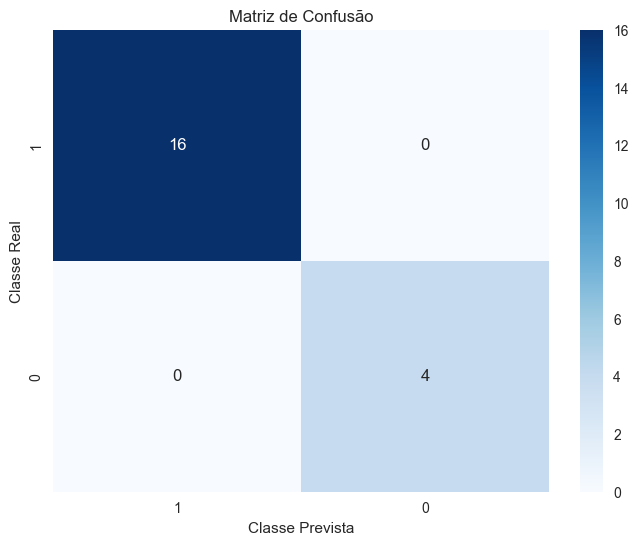

In [166]:
#avaliação
avaliacao_geral(y_test,predict_nb,y["is_anunciante"].unique())

In [167]:
#vendo o desempenho na base toda
for i in metricas:
    print(f"Métrica - {i}")
    score = cross_val_score(gauss_nb,x_transformed.values,y["is_anunciante"].values,cv=cv, scoring=i)
    print(score,score.mean())  

Métrica - accuracy
[0.96 1.   1.   1.  ] 0.99
Métrica - f1_weighted
[0.95826558 1.         1.         1.        ] 0.9895663956639567


##### Decision Tree

In [168]:
#predição
decision_tree.fit(x_train, y_train)
predict_dt = decision_tree.predict(x_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



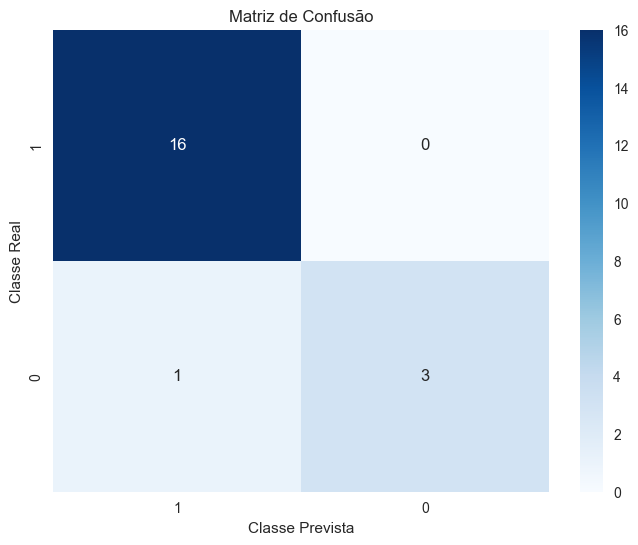

In [169]:
#avaliação
avaliacao_geral(y_test,predict_dt,y["is_anunciante"].unique())

In [170]:
#vendo o desempenho na base toda
for i in metricas:
    print(f"Métrica - {i}")
    score = cross_val_score(decision_tree,x_transformed.values,y["is_anunciante"].values,cv=cv, scoring=i)
    print(score,score.mean())  

Métrica - accuracy
[0.92       0.96       1.         0.91666667] 0.9491666666666666
Métrica - f1_weighted
[0.91190476 0.96130536 1.         0.91666667] 0.9474691974691974


##### K Nearest Neighboors

In [61]:
#predição
knn.fit(x_train, y_train)
predict_knn = knn.predict(x_test)

c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.50      0.67         4

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0.91      0.90      0.89        20



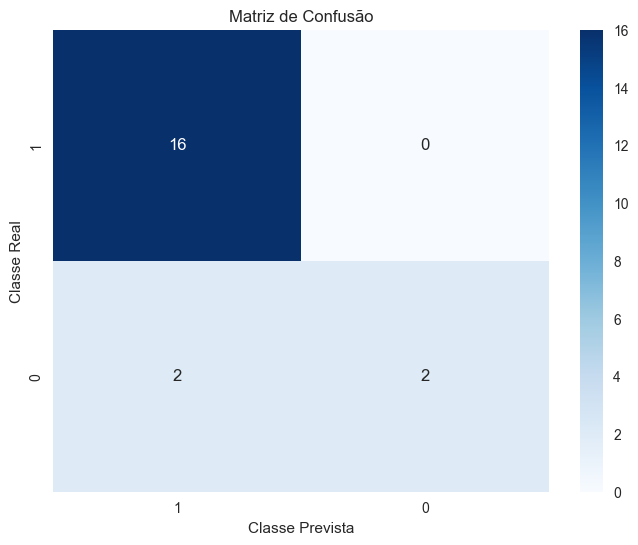

In [62]:
#avaliação
avaliacao_geral(y_test,predict_knn,y["is_anunciante"].unique())

In [ ]:
#vendo o desempenho na base toda
for i in metricas:
    print(f"Métrica - {i}")
    score = cross_val_score(knn,x_transformed.values,y["is_anunciante"].values,cv=cv, scoring=i)
    print(score,score.mean())  

Métrica - accuracy
[0.92       0.96       1.         0.91666667] 0.9491666666666666
Métrica - f1_weighted
[0.91190476 0.96130536 1.         0.91666667] 0.9474691974691974


### Base tratada e Modelos com melhores hiperparâmetros

##### Naive Bayes

In [174]:
params = { 
    'var_smoothing': np.logspace(0,-9, num=100) 
}

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
gauss_nb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=params, scoring='accuracy', refit=True, cv=cv)

In [175]:
#predição
gauss_nb_grid.fit(x_train, y_train)
predict_nb_grid = gauss_nb_grid.predict(x_test)

#avaliação
avaliacao_geral(y_test,predict_nb_grid)

c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

##### Decision Tree

In [176]:
decision_tree.get_depth()

6

In [177]:
params = {
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split':[2, 5, 10,20],
    'min_samples_leaf':[1, 2, 5, 10],
    'max_features':[None, 'sqrt', 'log2']
}

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
decision_tree_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, scoring='accuracy', refit=True, cv=cv)

In [178]:
decision_tree_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')>

In [179]:
#predição
decision_tree_grid.fit(x_train, y_train)
predict_decisiontree_grid = decision_tree_grid.predict(x_test)

#avaliação
avaliacao_geral(y_test,predict_decisiontree_grid)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.75      0.75      0.75         4

    accuracy                           0.90        20
   macro avg       0.84      0.84      0.84        20
weighted avg       0.90      0.90      0.90        20



##### K Nearest Neighbors

In [63]:
# Parâmetros do grid search
params = {
    'n_neighbors': np.arange(1, 20, 2),   # Testando valores de K ímpares de 1 até 19
    'weights': ['uniform', 'distance'],    # Pesos uniformes ou pela distância
    'metric': ['minkowski', 'manhattan'],  # Métricas de distância
    'p': [1, 2], # p=1 para Manhattan e p=2 para Euclidiana (Minkowski)
    'algorithm':['auto','kd_tree', 'ball_tree','brute']
}

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring='accuracy', refit=True, cv=cv)

In [64]:
#predição
knn_grid.fit(x_train, y_train)
predict_knn_grid = knn_grid.predict(x_test)

#avaliação
avaliacao_geral(y_test,predict_knn_grid)

c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### Naive Bayes

##### Decision Tree

##### K Nearest Neighboors

### Balanceamento de Classes (SMOTE)

C:\Users\guilhermebarbosa-ieg\AppData\Local\Temp\ipykernel_31904\3355873154.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classe', y='Contagem', data=count, palette="viridis")


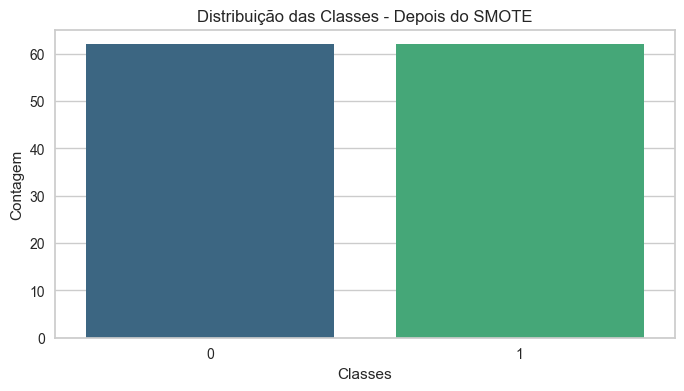

In [65]:
#base de treino
smote = SMOTE(k_neighbors = 5, random_state = SEED) 
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Contagem das classes depois do SMOTE
# Gera a contagem das classes
count = y_train_smote.value_counts().reset_index()
count.columns = ['Classe', 'Contagem']  # Nomeia as colunas

# Plota o gráfico
plt.figure(figsize=(8, 4))
sns.barplot(x='Classe', y='Contagem', data=count, palette="viridis")
plt.title("Distribuição das Classes - Depois do SMOTE")
plt.xlabel("Classes")
plt.ylabel("Contagem")
plt.show()

C:\Users\guilhermebarbosa-ieg\AppData\Local\Temp\ipykernel_31904\428773875.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classe', y='Contagem', data=count, palette="viridis")


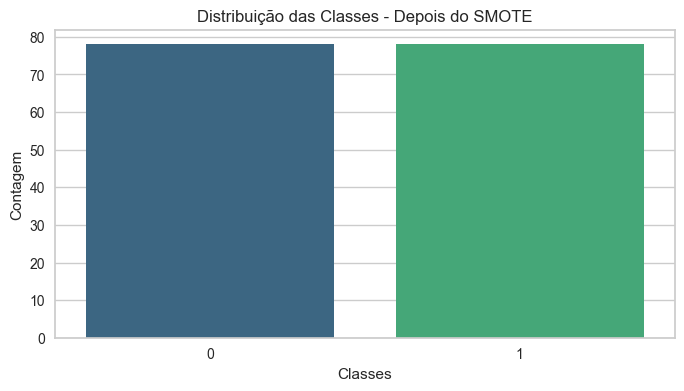

In [66]:
#base de treino
smote = SMOTE(k_neighbors = 5, random_state = SEED) 
x_smote, y_smote = smote.fit_resample(x_transformed, y)

# Contagem das classes depois do SMOTE
# Gera a contagem das classes
count = y_smote.value_counts().reset_index()
count.columns = ['Classe', 'Contagem']  # Nomeia as colunas

# Plota o gráfico
plt.figure(figsize=(8, 4))
sns.barplot(x='Classe', y='Contagem', data=count, palette="viridis")
plt.title("Distribuição das Classes - Depois do SMOTE")
plt.xlabel("Classes")
plt.ylabel("Contagem")
plt.show()

##### Naive Bayes

In [184]:
#rodando com o smote no treino
gauss_nb_grid.fit(x_train_smote, y_train_smote)
predict_nb_grid_trainsmote = gauss_nb_grid.predict(x_test)

#avaliação
avaliacao_geral(y_test,predict_nb_grid_trainsmote)

c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

In [185]:
#separação de treino e teste
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.2, random_state=SEED)

#rodando com o smote no treino
gauss_nb_grid.fit(x_train_smote, y_train_smote)
predict_nb_grid_smoteall = gauss_nb_grid.predict(x_test_smote)

#avaliação
avaliacao_geral(y_test_smote,predict_nb_grid_smoteall)

c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

##### Decision Tree

In [186]:
smote = SMOTE(k_neighbors = 5, random_state = SEED) 
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [187]:
#rodando com o smote no treino
decision_tree_grid.fit(x_train_smote, y_train_smote)
predict_decisiontree_grid_trainsmote = decision_tree_grid.predict(x_test)

#avaliação
avaliacao_geral(y_test,predict_decisiontree_grid_trainsmote)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



In [188]:
smote = SMOTE(k_neighbors = 5, random_state = SEED) 
x_smote, y_smote = smote.fit_resample(x_transformed, y)

In [189]:
#separação de treino e teste
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.2, random_state=SEED)

#rodando com o smote no treino
decision_tree_grid.fit(x_train_smote, y_train_smote)
predict_decisiontree_grid_smoteall = decision_tree_grid.predict(x_test_smote)

#avaliação
avaliacao_geral(y_test_smote,predict_decisiontree_grid_smoteall)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



##### K Nearest Neigboors 

In [67]:
smote = SMOTE(k_neighbors = 5, random_state = SEED) 
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [68]:
#rodando com o smote no treino
knn_grid.fit(x_train_smote, y_train_smote)
predict_knn_grid_trainsmote = knn_grid.predict(x_test)

#avaliação
avaliacao_geral(y_test,predict_knn_grid_trainsmote)

c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



c:\Python\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [192]:
smote = SMOTE(k_neighbors = 5, random_state = SEED) 
x_smote, y_smote = smote.fit_resample(x_transformed, y)

In [193]:
#separação de treino e teste
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.2, random_state=SEED)

#rodando com o smote no treino
knn_grid.fit(x_train_smote, y_train_smote)
predict_knn_grid_smoteall = knn_grid.predict(x_test_smote)

#avaliação
avaliacao_geral(y_test_smote,predict_knn_grid_smoteall)

c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Principal Component Analysis (PCA)

In [ ]:
pca = PCA().fit(x_train_smote)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


##### K Nearest Neighbors

In [197]:
for n in range(1,13):
        
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_smote)
    x_test_pca = pca.transform(x_test_smote)
    
    knn_grid.fit(x_train_pca, y_train_smote)
    predict_knn_pca = knn_grid.predict(x_test_pca)
        
    
    print(f'N Componentes: {n}')
    print(classification_report(y_test_smote, predict_knn_pca))
    

c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 1
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 2
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        18

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 4
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 6
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 11
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


N Componentes: 12
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



### Serialização do Melhor Modelo

In [205]:
knn_grid.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [91]:
import joblib as jb

smote = SMOTE(k_neighbors = 5, random_state = SEED) 
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

#rodando com o smote no treino
knn = knn_grid.best_estimator_
knn_grid.fit(x_train_smote, y_train_smote)

jb.dump(knn, "predict_anunciante.joblib")
jb.dump(pipeline,"transformer_anunciante.joblib")


c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['transformer_anunciante.joblib']